# ECEMP 2022. Skill Workshop 01. ENBIOS case study

This Jupyter Notebook has been prepared by Miquel Sierra and Alex de Tomas researchers of the LIVEN lab, SosteniPra research group at the Institute of Environmental Science and Technology, Universitat Auronoma de Barcelona. For any questions about the notebook contact us in miquel.sierra@uab.cat and AlexanderDe.Tomas@autonoma.cat. For questions about ENBIOS and the related projects you can reach the director of the LIVEN Lab: cristina.madrid@uab.cat.

The notebook will  will guide you through ENBIOS preparation and use. A simple case study including onshore wind and open ground photovoltaic technologies in Spain, according to PNIEC, was prepared. The materials you need to run ENBIOS in this notebook are here (https://drive.google.com/drive/folders/1YC6dtH-pPvL2UjO-z_udw6YKJ8lLBrZm?hl=es). The URL of the BaseFile you need is here (https://docs.google.com/spreadsheets/d/1uJFMEDOn_HlaJsQ8A1nz7oad0p6WxwJ5rzsQwRA39g8/edit#gid=387453521).

In [ ]:
from enbios.bin.script import Enbios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

enbios = Enbios()

**Before you start with next steps**: please check the BaseFile that has been provided to you. Try to recognise all the elements we commented during the presentation in the sheets "BareProcessors top levels", "BareProcessors simulation" and "ScalarIndicators". It has been filled for you, but in case you don't understand or are curious about something, you can always ask us during the workshop.

### Step 1: Prepare the files you need to run enbios

**To save some time, we have done this step for you. However, here we leave you a brief explanation of the process in case you might want to use ENBIOS on your own in the future.**

ENBIOS needs several input files to be able to do its calculations. These include the following:

1. The BaseFile with all the required information.
2. The input data file: a csv file containing the data of the energy produced by the technologies that define your system for several scenarios. 
3. The latest version of the Ecoinvent Life Cycle Impact Assessment (LCIA) methods implemented in the ecoinvent database. It can be downlowded from Ecoinvent website: login -> Files -> Supporting documents -> LCIA_implementation.zip.
4. The spold files (.spold) of all the Ecoinvent processes to be used in your simulation. In our case, the spold files for onshore wind (1-3MW) and openground photovoltaics electicity production in Spain.

ENBIOS has the following intermediate commands for data preparation (already executed as mentioned above): lcia_implementation_to_csv, lci_to_nis and list_lcia_indicators. More information on the commands can be found in ENBIOS User Manual (in the Google Drive Folder -> Documents). Examples of the resulting files from executing these commands can be found in the Google Drive Folder -> Intermediate files examples, where you can also find a more exhaustive Jupyter Notebook in case you want to follow all these intermediate steps to run ENBIOS.

### Step 2: Run enviro

"enviro" is the function that runs ENBIOS calculations. It requires a yaml file that specifies the Base File path and the simulation file path. You have to prepare the yaml file before running enviro, by following these instructions:
1.	Download the yaml file provided in the Google Drive Folder -> files and open it with a text editor software (i.e. Sublime Text, Notepad++, etc).
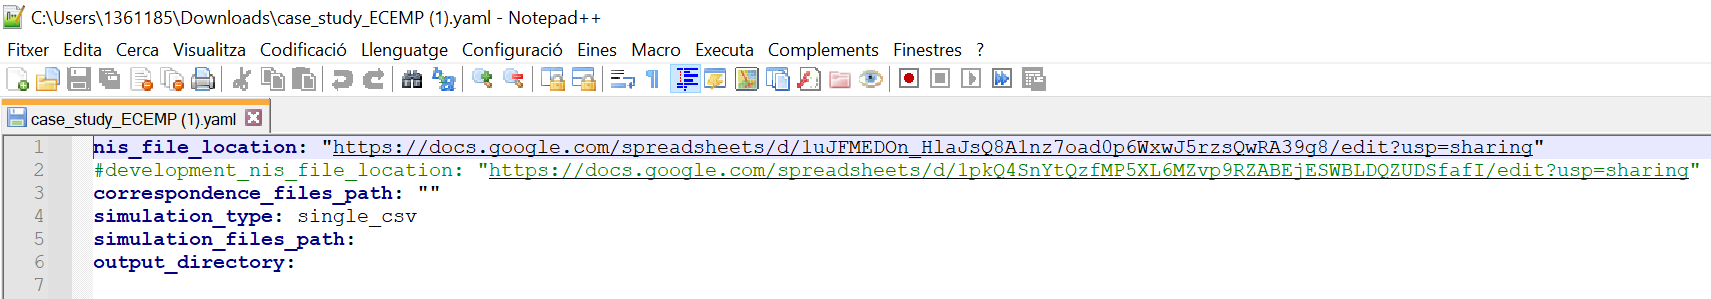

2. The .yaml file contains the following lines (**in bold, those lines you have to edit**):

•	nis_file_location: the BaseFile URL. The same mentioned above but is also written for you.

•	development_nis_file_location: leave it as it is. You will not use it

•	simulation_type: set to “single_csv”.

**•	simulation_files_path: path to the input data file. Copy here the local path where you have saved in your hard drive the file flow_out_sum.csv.**

**•	output_directory: path of the local directory where all outputs of the execution will be saved.**

Now you copy and paste the local path to the yaml file you just modified in the variable "yaml_path"

In [ ]:
yaml_path = r'your_local_path_to_modified_yaml\case_study_ECEMP.yaml'

Now we will start the simulation. NOTE it might take a few minutes and show a lot of messages such as: 

"INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("authenticators")" 

**It's OK!!**

In [ ]:
enbios.enviro(yaml_path)

If you get an error such as “ERROR:root:No database connection defined (DB_CONNECTION_STRING), exiting now!”, try closing the BaseFile in your browser and run the cell again. If the problem keeps happening, you will have to run the simulation from the terminal. 

In this case, first, open Anaconda Navigator and activate "enbios" environment prior to opening the Terminal. 

Then, execute the code: enbios enviro yaml_filename (with the local path to your yaml file). For more details you can check the ENBIOS Manual, page 25.

### Step 3: Results visualisation

The results from runing ENBIOS are stored in a file called "indicators.csv" (you can find an example file of how these results should look like in the Google Drive Folder -> Files). The function below provides a graphical visualisation of the results.

**Input requirements** (to be specified in the cell below): 
1. results_path: local path where the enbios results were stored. The name of the csv file generated by enbios should be: indicators.csv.
2. dendrogram_level: number (integer) corresponding to the dendrogram level you want to explore.
3. plot_output_path: write the local path for the output .png graphs to be saved.
4. output_path: write the local path to the folder you have downloaded all the Files from Google Drive.

In [ ]:
results_path = r'your_local_path\indicators.csv'
dendrogram_level = 0
plot_output_path = r'your_local_FOLDER_path_where_plots_should_save'
output_path = r'your_local_FOLDER_path_where_the_GDrive_Files_Where_Downloaded'

def visualization (dendrogram_level, plot_output_path):
    """
    Params:
    ->dendogram_level: integer 
    ->plot_output_path: path to save the results
    """
    
    df = pd.read_csv(results_path, delimiter=',')
    #rename the columns. Create a standard names
    def rename_columns(df):
        a=df.columns.tolist()
        namecolumns=('Scenario','System','Period','Scope','Processor','Indicator','Value','Unit')
        counter=0
        for i in ddd:
            df.rename(columns={i:namecolumns[counter]},inplace=True)
            counter=counter+1 
    #include the units
    dfunit=pd.read_excel(output_path + '\lcia_implementation_units_filtered.xlsx')
    mydi=dict(zip(dfunit.Indicator,dfunit.Unit))
    for key in mydi.keys():
        key=str(key)
        df.loc[df.Indicator==key,'Unit']=mydi[key]
    # #Create a dendrogram lvl maker
    df = df.loc[~df["Processor"].str.contains("environment")]
    df["Dendrogram level"] = df["Processor"].str.count("\.")
    df.drop(df[df['Scope']=='Internal'].index, inplace=True)
    listindicatorr=df['Indicator'].unique().tolist()
    label=df['Unit'].unique().tolist()
    #define a new class to iterate over the dataframes
    class my_dictionary(dict):
        # __init__ function
        def __init__(self):
            self = dict()
        def add(self, key, value):
            self[key] = value
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #Crea dataframes per cada indicador. Utilitza my dictionary per guardar-los a un diccionari
    dict_obj = my_dictionary()
    for i in df.columns:
        nom_dataframes=[]
        listindicators=df['Indicator'].unique()
        listindicator=listindicators.tolist()    
    for i,g in df.groupby('Indicator'):
        globals()['df_'+str(i)]=g
        nom_dataframes.append(i)
        dict_obj.add(i,g)
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #visualització
    sns.set()
    sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})
    sns.set_context("paper")
    fig, axes = plt.subplots(3,2,figsize=(10,10),dpi=500, )
    plt.subplots_adjust(left=0.1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
    
    colors=['r','b','y','mediumaquamarine','navajowhite','pink',] #define the colors
    color= iter(colors)
    for (key, data), ax in zip(dict_obj.items(), axes.ravel()): #iterate plots and axis
        fig.suptitle('Environmental Impacts in level {}'.format(dendrogram_level))
        data=data.loc[data['Dendrogram level'] == dendrogram_level]
        #get the unit label
        unit=data['Unit'].unique().tolist()
        #plot
        sns.barplot(ax=ax,x='Scenario',y='Value',data=data,color=next(color),alpha=0.8,saturation=0.7).set(
        xlabel='',ylabel=str(unit[0]))
        
        title=str(key)
        ax.set_title(title)
    plt.savefig(plot_output_path +'\Plot_Result'+'.png',facecolor='w', dpi=500)

            
visualization(dendrogram_level,plot_output_path)